# Additional variables and functions

In [38]:
def make_att_from_quest(selected_questions):
    # you can also use it to check all the attitudes which contains a word!
    
    if type(selected_questions) == type('abc'):
        selected_questions = [selected_questions]
    
    selected_attitudes = list()
    for att in list_of_attitudes:
        for quest in selected_questions:
            if quest in att:
                selected_attitudes.append(att)
                break
                
    return selected_attitudes

# make_att_from_quest('Know Science')

In [39]:
# make_att_from_quest('Know Science')

['Know Science:A lot',
 'Know Science:Some',
 'Know Science:Not much',
 'Know Science:Nothing at all',
 'Know Science:(DK)',
 'Know Science:(Refused)']

In [42]:
list_science_related_questions = ['Know Science', 'Understand meaning Sci', 'Study disease is science', 'Poetry is science', 'Learned Sci in Prim.School', 'Learned Sci in Sec.School', 'Learned Sci in College/Uni', 'Searched Sci past 30d', 'Searched Med past 30d', 'Searched Sci', 'Searched Med', 'Confidence NGO', 'Confidence Hospitals', 'Trust neighborhood', 'Trust government', 'Trust Scientists', 'Trust Journalists', 'Trust Doctors', 'Trust NGO workers', 'Trust traditional Healers', 'Trust science', 'Trust Scientists 4 info', 'Trust scientist intentions', 'Trust scientists honesty', 'Trust scientist in Med Comp intentions', 'Trust scientists in Med Comp honesty', 'Science benefits', 'Science benefits you', 'Science improve next gen', 'Science will increase jobs', 'Who trust most for Med Advice', 'Trust gov 4 Med Advice', 'Trust Doc 4 med advice', 'Ever heard of vaccines', 'Vaccines important to children', 'Vaccines Safe', 'Vaccines Effective', 'Have Children', 'Your Child Received Vax', 'Religion', 'Science disagreed w your religion', '(disagreement)Believe science or religion', 'How feel science']

In [43]:
list_science_related_attitudes = make_att_from_quest(list_science_related_questions)

# list_science_related_attitudes

In [41]:
def get_col_values(keys, df=wgm_bool):
    
    cols = list()
    
    if type(keys) == type("abc"):
        keys = [keys]
        
    for key in keys:
        col = df[key].values
        cols.append(col)
    
    if len(cols) == 1:
        cols = cols[0]
        
    return cols
        

In [42]:
# get_col_values('Know Science:Nothing at all')
get_col_values(['Know Science:Nothing at all','Trust Scientists 4 info:A lot'] )

[array([False, False, False, ..., False, False, False]),
 array([ True, False, False, ..., False, False, False])]

In [46]:
countries_list = wgm_labels["Country"].unique()
len(countries_list)

144

# Statistical and Network functions

### Correlations

In [47]:
def spearmanr_(*args):
    # this version returns only r, which will be used for making the network
    [r,p] = stt.spearmanr(*args)
    return r

In [48]:
def dino_semicorr(x,y):
    x = np.array(x)
    y = np.array(y)
    
    numer = np.sum(x==y).astype("float")
    return numer/len(x)
    

In [49]:
def dino_corr(x,y):
    sem = dino_semicorr(x,y)
    corr = (sem*2)-1
    return corr

In [50]:
# dino_semicorr([1,1,2,2],[1,2,3,4])
# dino_corr([1,1,2,2],[1,2,3,4])

### Corr to distance

In [51]:
def corr2distance(corr, method='linear', min_=0, max_=1):
    if method=='linear':
        d = ((-corr+1)/2)
        
    elif method == 'sqrt':
        d = np.sqrt(0.5*(1-corr))
        
    elif method == 'square':
        d = np.sqrt((1-corr**2))
        
    else:
        raise Exception("Method not found")
        
    d = (d*(max_-min_))+min_
    
    return d
    

In [52]:
# corr2distance(0)

### Make graph

In [53]:
def make_graph(list_of_nodes, metrics, exclude_same_question=True):
    G = nx.Graph()
    for i, node_i in enumerate(list_of_nodes):
        for j, node_j in enumerate(list_of_nodes):
            if j <= i:
                continue

            if exclude_same_question:
                if node_i.split(sep=':')[0] == node_j.split(sep=':')[0]:
                    # if they belong to the same question
                    continue

            [c1,c2] = get_col_values([node_i,node_j])
            weight = metrics(c1,c2)
            G.add_weighted_edges_from([(node_i,node_j,weight)])
    return G

Test it

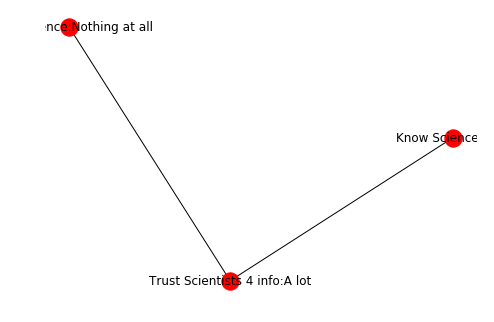

In [54]:
# (node_i,node_j,weight
metrics = spearmanr_
list_of_nodes = ['Know Science:Nothing at all', 'Trust Scientists 4 info:A lot', 'Know Science:A lot']

G = make_graph(list_of_nodes, metrics)
nx.draw(G, with_labels=True)
plt.show()

# Sum up of the useful variables and functions

###### Main dataframes:
`wgm_numeric`

`wgm_labels`

`wgm_bool`

###### lists:
`list_of_catheg_questions`

`list_science_related_questions` -&- `list_science_related_attitudes`

`countries_list`

###### functions:
`[selected_attitudes] = make_att_from_quest(selected_questions)`

`[G] = make_graph(list_of_nodes, metrics, exclude_same_question=True)`

`d_semicorr(x,y)` and `d_corr(x,y)`

`spearmanr_(x,y)`

`corr2distance(corr, method='linear', min_=0, max_=1)`

`[cols] = get_col_values(keys, df=wgm_bool)`

---------

# Test it on vaccine attitudes

Version with all attitudes

In [39]:
# make_att_from_quest("Vaccines")
neutral_attitudes = ['Vaccines important to children:Neither agree nor disagree', 'Vaccines Safe:Neither agree nor disagree', 'Vaccines Effective:Neither agree nor disagree']
positive_attitudes = ['Vaccines important to children:Strongly agree',
 'Vaccines important to children:Somewhat agree','Vaccines Safe:Strongly agree',
 'Vaccines Safe:Somewhat agree','Vaccines Effective:Strongly agree',
 'Vaccines Effective:Somewhat agree']
negative_attitudes = ['Vaccines important to children:Somewhat disagree',
 'Vaccines important to children:Strongly disagree','Vaccines Safe:Somewhat disagree',
 'Vaccines Safe:Strongly disagree','Vaccines Effective:Somewhat disagree',
 'Vaccines Effective:Strongly disagree']

In [40]:
def get_corr_attitudes(att_vec1,att_vec2,corr_fun,df_):
    if type(att_vec1) == type('abc'):
        att_vec1 = [att_vec1]
    if type(att_vec2) == type('abc'):
        att_vec2 = [att_vec1]
        
    corr_vec = list()
    
    for att1 in att_vec1:
        for att2 in att_vec2:
            if att1.split(sep=':') == att2.split(sep=':'):
                #if they belong to the same question
                continue
                
            [x,y] = get_col_values([att1,att2], df=df_)
            corr = corr_fun(x,y)

            corr_vec.append(corr)
            
    corr_vec = np.array(corr_vec)
    
    return corr_vec

In [41]:
def analyze_country(country,neutral_attitudes,positive_attitudes,negative_attitudes):
    country_df = wgm_bool [wgm_bool["Country:"+country]]
    
#     print(country_df.head())
    
    neutr_pos_vec = get_corr_attitudes(neutral_attitudes,positive_attitudes,spearmanr_,country_df)
    neutr_neg_vec = get_corr_attitudes(neutral_attitudes,negative_attitudes,spearmanr_,country_df)
    
    mean_pos = np.mean(neutr_pos_vec)
    std_pos = np.std(neutr_pos_vec)
    
    mean_neg = np.mean(neutr_neg_vec)
    std_neg = np.std(neutr_neg_vec)
    
    mean_diff = mean_neg - mean_pos
    std_diff = np.sqrt(std_neg**2+std_pos**2)
    
    diff_min = mean_diff-std_diff
    diff_max = mean_diff+std_diff
    
    side_check = -100
    if diff_min > 0:
        side_check = 1
    elif diff_min <= 0 and diff_max >= 0:
        side_check = 0
    elif diff_max <= 0:
        side_check = -1
    else:
        raise Exception("Unexpected inteval found",[mean_pos,std_pos,mean_neg,std_neg,mean_diff,std_diff])
        
        
    return [mean_pos,std_pos,mean_neg,std_neg,mean_diff,std_diff,side_check]
    
    

In [42]:
# analyze_country("Italy",neutral_attitudes,positive_attitudes,negative_attitudes)
analyze_country("Spain",neutral_attitudes,positive_attitudes,negative_attitudes)

[-0.2254229300043052,
 0.15166086999693032,
 0.008435020563246996,
 0.06350087487066153,
 0.23385795056755218,
 0.16441830980023242,
 1]

In [43]:
# countries_list

In [44]:
plus = list()
zeros = list()
minus = list()

for country in countries_list:
    
    try:
        country_vec = analyze_country(country,neutral_attitudes,positive_attitudes,negative_attitudes)

        if country_vec[6] == 1:
            plus.append(country)
        elif country_vec[6] == 0:
            zeros.append(country)
        elif country_vec[6] == -1:
            minus.append(country)
        else:
            raise Exception("Value not recognized")
    except:
        print(country, " bad data")

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Egypt  bad data
Lebanon  bad data
Palestinian Territories  bad data
Cambodia  bad data
Laos  bad data
Ethiopia  bad data
Dominican Republic  bad data
Honduras  bad data
Nicaragua  bad data
Portugal  bad data
Northern Cyprus  bad data


In [45]:
print(len(plus))
print(len(zeros))
print(len(minus))


26
107
0


### Add grouped attitudes

In [46]:
att1 ='Vaccines important to children:Strongly agree'
att2 = 'Vaccines important to children:Somewhat agree'
wgm_bool["Vaccines important to children:Agree"] = wgm_bool[att1] | wgm_bool[att2]

att1 ='Vaccines Safe:Strongly agree'
att2 = 'Vaccines Safe:Somewhat agree'
wgm_bool["Vaccines Safe:Agree"] = wgm_bool[att1] | wgm_bool[att2]

att1 ='Vaccines Effective:Strongly agree'
att2 = 'Vaccines Effective:Somewhat agree'
wgm_bool["Vaccines Effective:Agree"] = wgm_bool[att1] | wgm_bool[att2]



att1 ='Vaccines important to children:Somewhat disagree'
att2 = 'Vaccines important to children:Strongly disagree'
wgm_bool["Vaccines important to children:Disagree"] = wgm_bool[att1] | wgm_bool[att2]

att1 ='Vaccines Safe:Somewhat disagree'
att2 = 'Vaccines Safe:Strongly disagree'
wgm_bool["Vaccines Safe:Disagree"] = wgm_bool[att1] | wgm_bool[att2]

att1 ='Vaccines Effective:Somewhat disagree'
att2 = 'Vaccines Effective:Strongly disagree'
wgm_bool["Vaccines Effective:Disagree"] = wgm_bool[att1] | wgm_bool[att2]


In [47]:
neutral_attitudes = ['Vaccines important to children:Neither agree nor disagree', 'Vaccines Safe:Neither agree nor disagree', 'Vaccines Effective:Neither agree nor disagree']
positive_attitudes = ['Vaccines important to children:Agree','Vaccines Safe:Agree',
 'Vaccines Effective:Agree']
negative_attitudes = ['Vaccines important to children:Disagree',
 'Vaccines Safe:Disagree',
 'Vaccines Effective:Disagree']

In [48]:
plus = list()
zeros = list()
minus = list()

count_n_values = list()

for country in countries_list:
    
    try:
        country_vec = analyze_country(country,neutral_attitudes,positive_attitudes,negative_attitudes)
        
        count_n_values.append([country,country_vec[4],country_vec[5],country_vec[6]])
        

        if country_vec[6] == 1:
            plus.append(country)
        elif country_vec[6] == 0:
            zeros.append(country)
        elif country_vec[6] == -1:
            minus.append(country)
        else:
            raise Exception("Value not recognized")
    except:
        print(country, " bad data")

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Cambodia  bad data
Northern Cyprus  bad data


In [49]:
print(len(plus))
print(len(zeros))
print(len(minus))

119
23
0


In [50]:
count_n_values = sorted(count_n_values, key=lambda tup: tup[1],reverse=True)
count_n_values


[['Spain', 0.5686557898673885, 0.15449281056351793, 1],
 ['Hungary', 0.5230912399188806, 0.19040354660331704, 1],
 ['Greece', 0.49248214616787767, 0.20604937773526463, 1],
 ['Lebanon', 0.4865529813020843, 0.24500415359600203, 1],
 ['United Kingdom', 0.48196446981754154, 0.1679982279541557, 1],
 ['Czech Republic', 0.47687481339165183, 0.19283810906455606, 1],
 ['Australia', 0.4633257032516611, 0.17486212224922104, 1],
 ['Italy', 0.45786116638896257, 0.18384374563996633, 1],
 ['Singapore', 0.4569748358568091, 0.10432385928048458, 1],
 ['New Zealand', 0.4386542693903214, 0.17692982545628733, 1],
 ['United States', 0.4377477475135717, 0.18319971000200563, 1],
 ['Croatia', 0.43340533253001046, 0.16521737083540378, 1],
 ['Bosnia and Herzegovina', 0.43118406974191925, 0.17674103201249727, 1],
 ['Finland', 0.42560689048593253, 0.2582357256561678, 1],
 ['Canada', 0.4184913387396406, 0.18783482587629183, 1],
 ['Yemen', 0.41645341892824156, 0.12877795898499336, 1],
 ['Egypt', 0.400985314325467, 0

In [51]:
# import csv

# with open("testfile.csv", 'w', newline='') as myfile:
#      wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
#      wr.writerow(count_n_values)

In [52]:
# import xlsxwriter

# with xlsxwriter.Workbook('test3.xlsx') as workbook:
#     worksheet = workbook.add_worksheet()

#     for row_num, data in enumerate(count_n_values):
#         worksheet.write_row(row_num, 0, data)

In [57]:
%matplotlib qt 
# %matplotlib inline

plt.rcdefaults()
fig, ax = plt.subplots()

vect_2_use = count_n_values[0:30]
# vect_2_use = count_n_values
# vect_2_use = count_n_values[-30:-1]

len_bar = np.array(vect_2_use)[:,1].astype('float')
error_bar = np.array(vect_2_use)[:,2].astype('float')
countries = np.array(vect_2_use)[:,0]

y_pos = np.arange(len(len_bar))

ax.barh(y_pos, len_bar, xerr=error_bar, align='center')
# ax.barh(y_pos, len_bar, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(countries)
ax.invert_yaxis()  # labels read top-to-bottom
plt.xticks(rotation=45)


plt.show()

fig.savefig("figuretest.pdf", bbox_inches='tight')

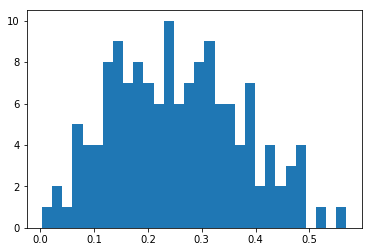

In [64]:
%matplotlib inline

avg_diffs = np.array(count_n_values)[:,1].astype('float')

fig, ax = plt.subplots()

plt.hist(avg_diffs,bins=30)

plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


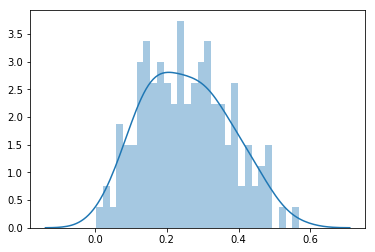

In [74]:
import seaborn as sns
fig, ax = plt.subplots()
sns.distplot(avg_diffs, bins=30)
# sns.kdeplot(avg_diffs)
plt.show()